[*********************100%***********************]  1 of 1 completed

Fetching data for PG...
Fetching data for UL...



[*********************100%***********************]  1 of 1 completed


PG Prices Head:
 Date
2019-11-29    107.233856
2019-12-02    107.813690
2019-12-03    108.015747
2019-12-04    109.403839
2019-12-05    109.482910
Name: (Close, PG), dtype: float64
UL Prices Head:
 Date
2019-11-29    49.927349
2019-12-02    49.751106
2019-12-03    49.675571
2019-12-04    49.952526
2019-12-05    49.818245
Name: (Close, UL), dtype: float64

Unit Root Test (ADF) for PG Prices:
ADF Statistic: -1.2729
p-value: 0.6415
Critical Values: {'1%': -3.4354, '5%': -2.8638, '10%': -2.5679}
PG Prices likely has a unit root (non-stationary).

Unit Root Test (ADF) for UL Prices:
ADF Statistic: -1.6766
p-value: 0.4432
Critical Values: {'1%': -3.4354, '5%': -2.8638, '10%': -2.5679}
UL Prices likely has a unit root (non-stationary).

Unit Root Test (ADF) for PG Returns:
ADF Statistic: -11.1661
p-value: 0.0000
Critical Values: {'1%': -3.4354, '5%': -2.8638, '10%': -2.5679}
PG Returns does not have a unit root (stationary).

Unit Root Test (ADF) for UL Returns:
ADF Statistic: -13.7601
p-valu

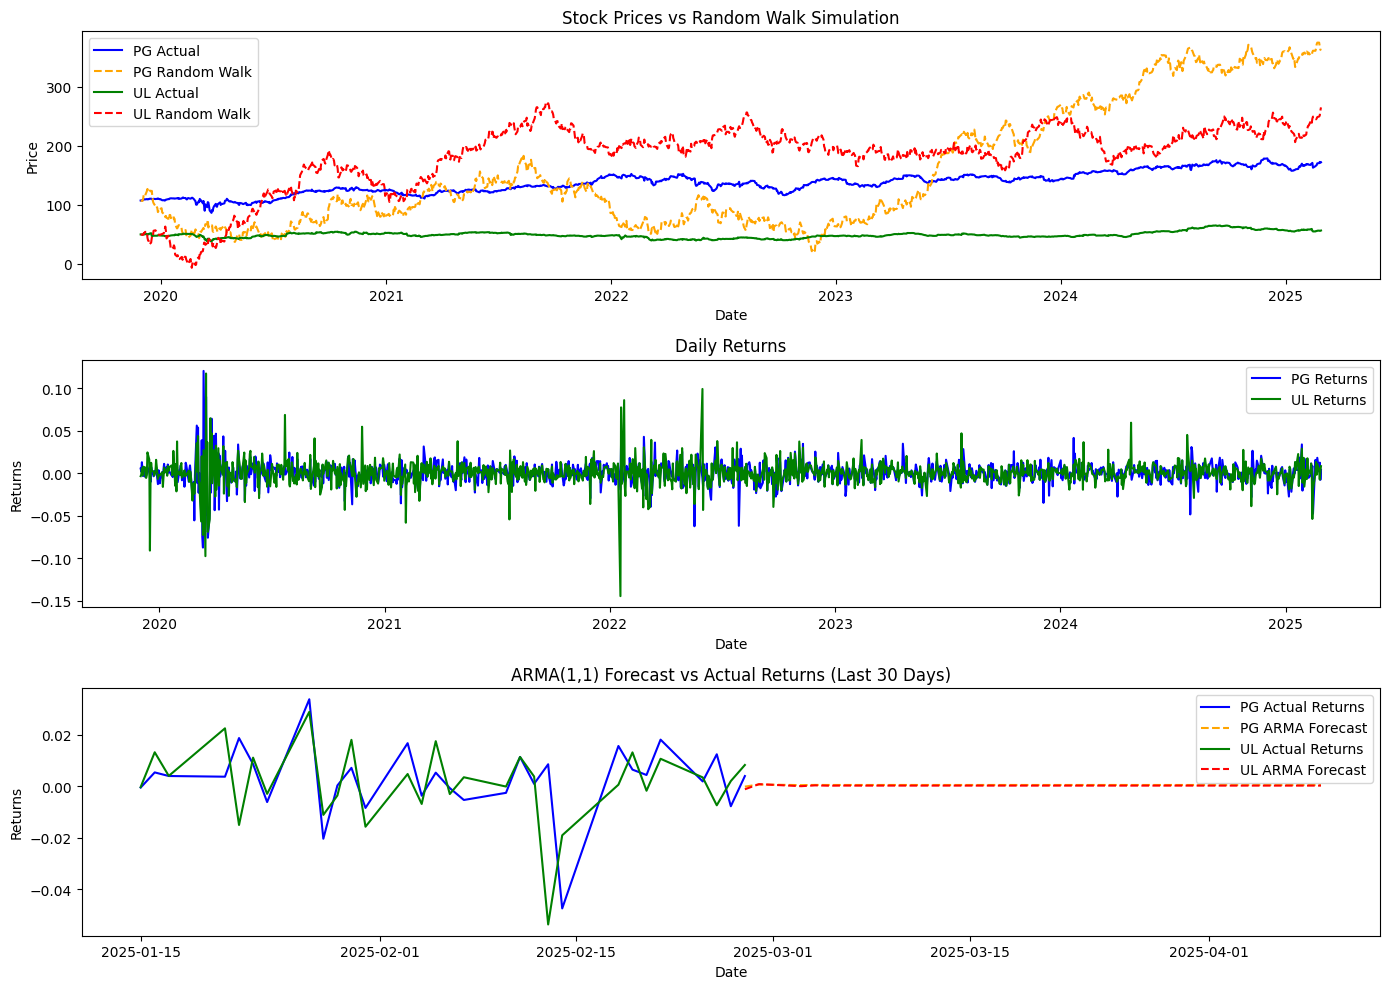

In [13]:
# Install required libraries in Colab
!pip install yfinance statsmodels matplotlib pandas numpy

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Fetch stock data for PG and UL from Nov 29, 2019
start_date = "2019-11-29"
end_date = "2025-02-28"

print("Fetching data for PG...")
pg_data = yf.download("PG", start=start_date, end=end_date)
print("Fetching data for UL...")
ul_data = yf.download("UL", start=start_date, end=end_date)

# Extract the 'Close' column correctly from MultiIndex
pg_prices = pg_data[("Close", "PG")].dropna()
ul_prices = ul_data[("Close", "UL")].dropna()
print("PG Prices Head:\n", pg_prices.head())
print("UL Prices Head:\n", ul_prices.head())

# Step 2: Simulate a Random Walk
def random_walk_simulation(initial_price, steps, scale=1):
    random_steps = np.random.normal(loc=0, scale=scale, size=steps)
    random_steps[0] = 0  # Start at initial price
    return initial_price + np.cumsum(random_steps)

pg_rw = random_walk_simulation(pg_prices.iloc[0], len(pg_prices), scale=5)
ul_rw = random_walk_simulation(ul_prices.iloc[0], len(ul_prices), scale=5)

# Step 3: Unit Root Test (ADF)
def unit_root_test(series, name):
    result = adfuller(series.dropna())
    print(f"\nUnit Root Test (ADF) for {name}:")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Critical Values:", {k: round(v, 4) for k, v in result[4].items()})
    if result[1] > 0.05:
        print(f"{name} likely has a unit root (non-stationary).")
    else:
        print(f"{name} does not have a unit root (stationary).")

pg_returns = pg_prices.pct_change().dropna()
ul_returns = ul_prices.pct_change().dropna()

unit_root_test(pg_prices, "PG Prices")
unit_root_test(ul_prices, "UL Prices")
unit_root_test(pg_returns, "PG Returns")
unit_root_test(ul_returns, "UL Returns")

# Step 4: Fit ARMA Model (ARMA(1,1))
def fit_arma(series, name):
    model = ARIMA(series, order=(1, 0, 1))
    fit = model.fit()
    print(f"\nARMA(1,1) Model Summary for {name}:")
    print(fit.summary().tables[1])
    return fit

pg_arma = fit_arma(pg_returns, "PG Returns")
ul_arma = fit_arma(ul_returns, "UL Returns")

# Step 5: Plotting
plt.figure(figsize=(14, 10))

# Random Walk vs Actual Prices
plt.subplot(3, 1, 1)
plt.plot(pg_prices.index, pg_prices, label="PG Actual", color="blue")
plt.plot(pg_prices.index, pg_rw, label="PG Random Walk", color="orange", linestyle="--")
plt.plot(ul_prices.index, ul_prices, label="UL Actual", color="green")
plt.plot(ul_prices.index, ul_rw, label="UL Random Walk", color="red", linestyle="--")
plt.title("Stock Prices vs Random Walk Simulation")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

# Returns
plt.subplot(3, 1, 2)
plt.plot(pg_returns.index, pg_returns, label="PG Returns", color="blue")
plt.plot(ul_returns.index, ul_returns, label="UL Returns", color="green")
plt.title("Daily Returns")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()

# ARMA Forecasts (last 30 days)
pg_forecast = pg_arma.forecast(steps=30)
ul_forecast = ul_arma.forecast(steps=30)
forecast_index = pd.date_range(start=pg_returns.index[-1], periods=30, freq="B")

plt.subplot(3, 1, 3)
plt.plot(pg_returns.index[-30:], pg_returns[-30:], label="PG Actual Returns", color="blue")
plt.plot(forecast_index, pg_forecast, label="PG ARMA Forecast", color="orange", linestyle="--")
plt.plot(ul_returns.index[-30:], ul_returns[-30:], label="UL Actual Returns", color="green")
plt.plot(forecast_index, ul_forecast, label="UL ARMA Forecast", color="red", linestyle="--")
plt.title("ARMA(1,1) Forecast vs Actual Returns (Last 30 Days)")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()

plt.tight_layout()
plt.show()

Fetching data for MCD...


[*********************100%***********************]  1 of 1 completed


Fetching data for YUM...


[*********************100%***********************]  1 of 1 completed


MCD Prices Head:
 Date
2019-11-29    173.220825
2019-12-02    173.844360
2019-12-03    172.009521
2019-12-04    173.069412
2019-12-05    172.980392
Name: (Close, MCD), dtype: float64
YUM Prices Head:
 Date
2019-11-29    91.292229
2019-12-02    91.192482
2019-12-03    90.185875
2019-12-04    89.959160
2019-12-05    89.342499
Name: (Close, YUM), dtype: float64

Unit Root Test (ADF) for MCD Prices:
ADF Statistic: -1.1816
p-value: 0.6814
Critical Values: {'1%': -3.4354, '5%': -2.8637, '10%': -2.5679}
MCD Prices likely has a unit root (non-stationary).

Unit Root Test (ADF) for YUM Prices:
ADF Statistic: -1.1341
p-value: 0.7013
Critical Values: {'1%': -3.4354, '5%': -2.8638, '10%': -2.568}
YUM Prices likely has a unit root (non-stationary).

Unit Root Test (ADF) for MCD Returns:
ADF Statistic: -9.1912
p-value: 0.0000
Critical Values: {'1%': -3.4354, '5%': -2.8638, '10%': -2.568}
MCD Returns does not have a unit root (stationary).

Unit Root Test (ADF) for YUM Returns:
ADF Statistic: -8.6598

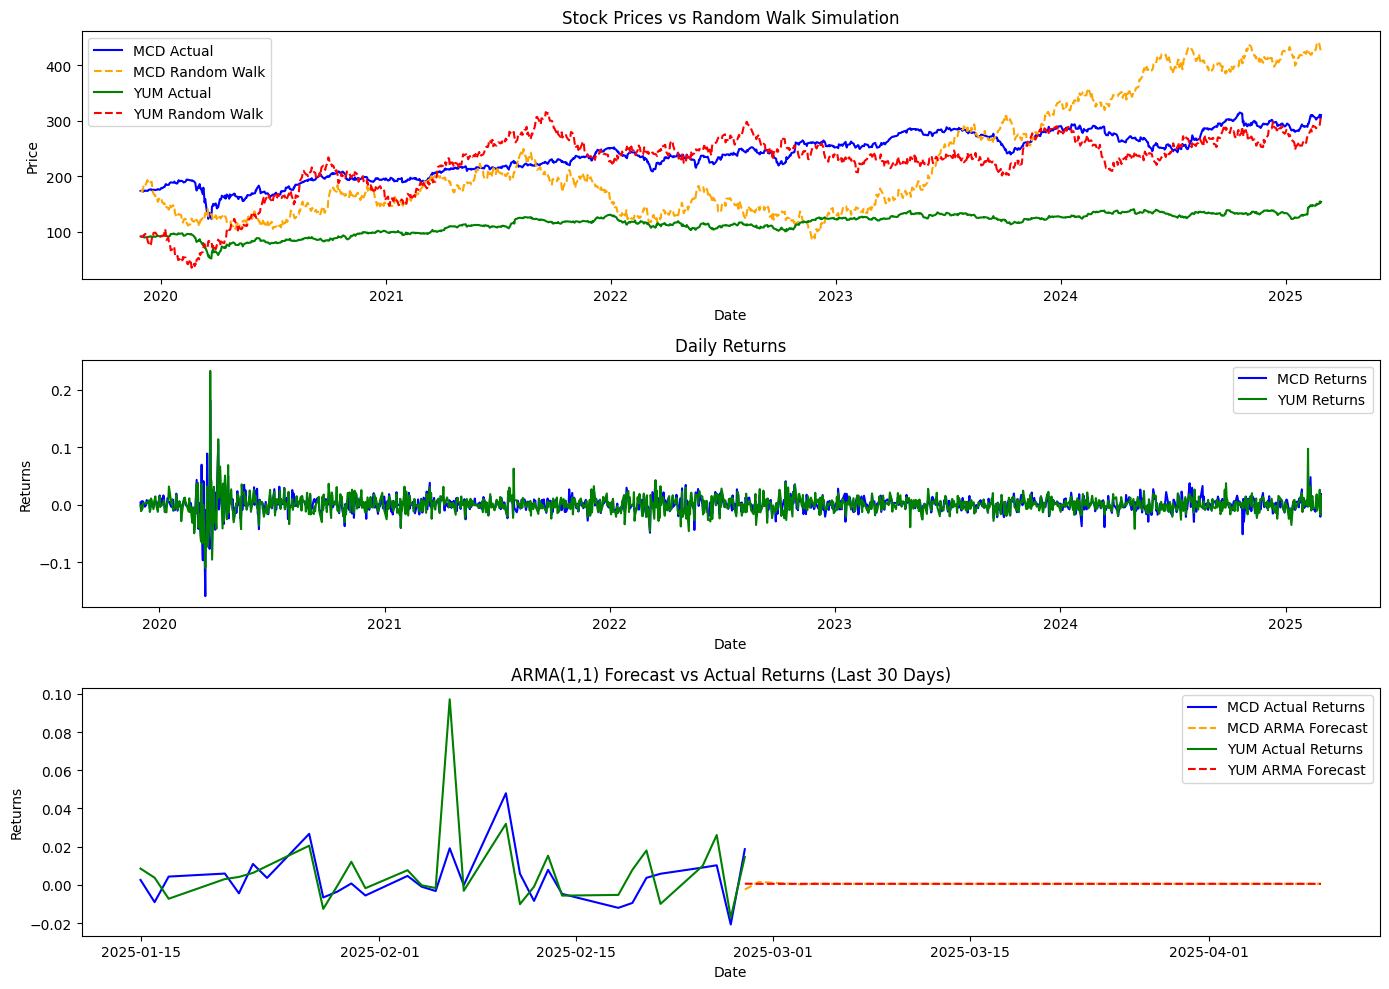

In [14]:
# Install required libraries in Colab
!pip install yfinance statsmodels matplotlib pandas numpy

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Fetch stock data for MCD and YUM from Nov 29, 2019
start_date = "2019-11-29"
end_date = "2025-02-28"

print("Fetching data for MCD...")
mcd_data = yf.download("MCD", start=start_date, end=end_date)
print("Fetching data for YUM...")
yum_data = yf.download("YUM", start=start_date, end=end_date)

# Extract the 'Close' column correctly from MultiIndex
mcd_prices = mcd_data[("Close", "MCD")].dropna()
yum_prices = yum_data[("Close", "YUM")].dropna()
print("MCD Prices Head:\n", mcd_prices.head())
print("YUM Prices Head:\n", yum_prices.head())

# Step 2: Simulate a Random Walk
def random_walk_simulation(initial_price, steps, scale=1):
    random_steps = np.random.normal(loc=0, scale=scale, size=steps)
    random_steps[0] = 0  # Start at initial price
    return initial_price + np.cumsum(random_steps)

mcd_rw = random_walk_simulation(mcd_prices.iloc[0], len(mcd_prices), scale=5)
yum_rw = random_walk_simulation(yum_prices.iloc[0], len(yum_prices), scale=5)

# Step 3: Unit Root Test (ADF)
def unit_root_test(series, name):
    result = adfuller(series.dropna())
    print(f"\nUnit Root Test (ADF) for {name}:")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Critical Values:", {k: round(v, 4) for k, v in result[4].items()})
    if result[1] > 0.05:
        print(f"{name} likely has a unit root (non-stationary).")
    else:
        print(f"{name} does not have a unit root (stationary).")

mcd_returns = mcd_prices.pct_change().dropna()
yum_returns = yum_prices.pct_change().dropna()

unit_root_test(mcd_prices, "MCD Prices")
unit_root_test(yum_prices, "YUM Prices")
unit_root_test(mcd_returns, "MCD Returns")
unit_root_test(yum_returns, "YUM Returns")

# Step 4: Fit ARMA Model (ARMA(1,1))
def fit_arma(series, name):
    model = ARIMA(series, order=(1, 0, 1))
    fit = model.fit()
    print(f"\nARMA(1,1) Model Summary for {name}:")
    print(fit.summary().tables[1])
    return fit

mcd_arma = fit_arma(mcd_returns, "MCD Returns")
yum_arma = fit_arma(yum_returns, "YUM Returns")

# Step 5: Plotting
plt.figure(figsize=(14, 10))

# Random Walk vs Actual Prices
plt.subplot(3, 1, 1)
plt.plot(mcd_prices.index, mcd_prices, label="MCD Actual", color="blue")
plt.plot(mcd_prices.index, mcd_rw, label="MCD Random Walk", color="orange", linestyle="--")
plt.plot(yum_prices.index, yum_prices, label="YUM Actual", color="green")
plt.plot(yum_prices.index, yum_rw, label="YUM Random Walk", color="red", linestyle="--")
plt.title("Stock Prices vs Random Walk Simulation")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

# Returns
plt.subplot(3, 1, 2)
plt.plot(mcd_returns.index, mcd_returns, label="MCD Returns", color="blue")
plt.plot(yum_returns.index, yum_returns, label="YUM Returns", color="green")
plt.title("Daily Returns")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()

# ARMA Forecasts (last 30 days)
mcd_forecast = mcd_arma.forecast(steps=30)
yum_forecast = yum_arma.forecast(steps=30)
forecast_index = pd.date_range(start=mcd_returns.index[-1], periods=30, freq="B")

plt.subplot(3, 1, 3)
plt.plot(mcd_returns.index[-30:], mcd_returns[-30:], label="MCD Actual Returns", color="blue")
plt.plot(forecast_index, mcd_forecast, label="MCD ARMA Forecast", color="orange", linestyle="--")
plt.plot(yum_returns.index[-30:], yum_returns[-30:], label="YUM Actual Returns", color="green")
plt.plot(forecast_index, yum_forecast, label="YUM ARMA Forecast", color="red", linestyle="--")
plt.title("ARMA(1,1) Forecast vs Actual Returns (Last 30 Days)")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()

plt.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for JPM...
Fetching data for BAC...
JPM Prices Head:
 Date
2019-11-29    113.444160
2019-12-02    113.194481
2019-12-03    111.739410
2019-12-04    113.943558
2019-12-05    114.563461
Name: (Close, JPM), dtype: float64
BAC Prices Head:
 Date
2019-11-29    29.264400
2019-12-02    29.361012
2019-12-03    28.842827
2019-12-04    29.115097
2019-12-05    29.221058
Name: (Close, BAC), dtype: float64

Unit Root Test (ADF) for JPM Prices:
ADF Statistic: 0.9084
p-value: 0.9932
Critical Values: {'1%': -3.4354, '5%': -2.8638, '10%': -2.568}
JPM Prices likely has a unit root (non-stationary).

Unit Root Test (ADF) for BAC Prices:
ADF Statistic: -1.3644
p-value: 0.5992
Critical Values: {'1%': -3.4354, '5%': -2.8638, '10%': -2.5679}
BAC Prices likely has a unit root (non-stationary).

Unit Root Test (ADF) for JPM Returns:
ADF Statistic: -10.5936
p-value: 0.0000
Critical Values: {'1%': -3.4354, '5%': -2.8638, '10%': -2.568}
JPM Returns does not have a unit root (stationary).

Unit Root 


ARMA(1,1) Model Summary for JPM Returns:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.001      1.592      0.111      -0.000       0.002
ar.L1         -0.6098      0.051    -12.023      0.000      -0.709      -0.510
ma.L1          0.4889      0.053      9.184      0.000       0.385       0.593
sigma2         0.0004   6.74e-06     59.204      0.000       0.000       0.000

ARMA(1,1) Model Summary for BAC Returns:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.001      0.948      0.343      -0.001       0.002
ar.L1         -0.4286      0.104     -4.126      0.000      -0.632      -0.225
ma.L1          0.3386      0.107      3.176      0.001       0.130       0.548
sigma2         0.0005   8.68e-06     55.763    

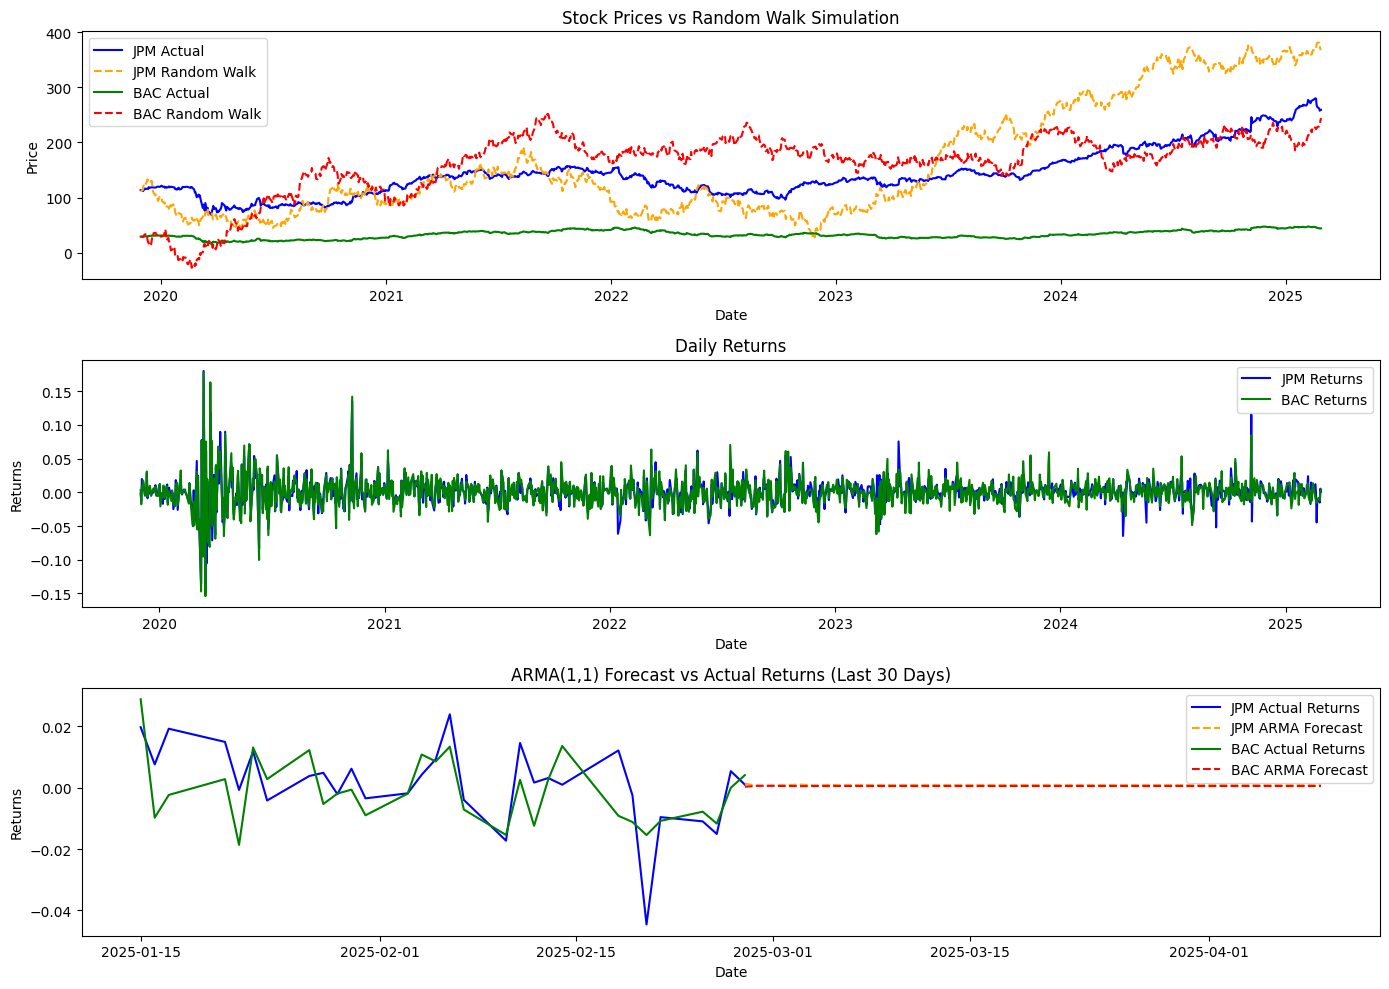

In [15]:
# Install required libraries in Colab
!pip install yfinance statsmodels matplotlib pandas numpy

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Fetch stock data for JPM and BAC from Nov 29, 2019
start_date = "2019-11-29"
end_date = "2025-02-28"

print("Fetching data for JPM...")
jpm_data = yf.download("JPM", start=start_date, end=end_date)
print("Fetching data for BAC...")
bac_data = yf.download("BAC", start=start_date, end=end_date)

# Extract the 'Close' column correctly from MultiIndex
jpm_prices = jpm_data[("Close", "JPM")].dropna()
bac_prices = bac_data[("Close", "BAC")].dropna()
print("JPM Prices Head:\n", jpm_prices.head())
print("BAC Prices Head:\n", bac_prices.head())

# Step 2: Simulate a Random Walk
def random_walk_simulation(initial_price, steps, scale=1):
    random_steps = np.random.normal(loc=0, scale=scale, size=steps)
    random_steps[0] = 0  # Start at initial price
    return initial_price + np.cumsum(random_steps)

jpm_rw = random_walk_simulation(jpm_prices.iloc[0], len(jpm_prices), scale=5)
bac_rw = random_walk_simulation(bac_prices.iloc[0], len(bac_prices), scale=5)

# Step 3: Unit Root Test (ADF)
def unit_root_test(series, name):
    result = adfuller(series.dropna())
    print(f"\nUnit Root Test (ADF) for {name}:")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Critical Values:", {k: round(v, 4) for k, v in result[4].items()})
    if result[1] > 0.05:
        print(f"{name} likely has a unit root (non-stationary).")
    else:
        print(f"{name} does not have a unit root (stationary).")

jpm_returns = jpm_prices.pct_change().dropna()
bac_returns = bac_prices.pct_change().dropna()

unit_root_test(jpm_prices, "JPM Prices")
unit_root_test(bac_prices, "BAC Prices")
unit_root_test(jpm_returns, "JPM Returns")
unit_root_test(bac_returns, "BAC Returns")

# Step 4: Fit ARMA Model (ARMA(1,1))
def fit_arma(series, name):
    model = ARIMA(series, order=(1, 0, 1))
    fit = model.fit()
    print(f"\nARMA(1,1) Model Summary for {name}:")
    print(fit.summary().tables[1])
    return fit

jpm_arma = fit_arma(jpm_returns, "JPM Returns")
bac_arma = fit_arma(bac_returns, "BAC Returns")

# Step 5: Plotting
plt.figure(figsize=(14, 10))

# Random Walk vs Actual Prices
plt.subplot(3, 1, 1)
plt.plot(jpm_prices.index, jpm_prices, label="JPM Actual", color="blue")
plt.plot(jpm_prices.index, jpm_rw, label="JPM Random Walk", color="orange", linestyle="--")
plt.plot(bac_prices.index, bac_prices, label="BAC Actual", color="green")
plt.plot(bac_prices.index, bac_rw, label="BAC Random Walk", color="red", linestyle="--")
plt.title("Stock Prices vs Random Walk Simulation")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

# Returns
plt.subplot(3, 1, 2)
plt.plot(jpm_returns.index, jpm_returns, label="JPM Returns", color="blue")
plt.plot(bac_returns.index, bac_returns, label="BAC Returns", color="green")
plt.title("Daily Returns")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()

# ARMA Forecasts (last 30 days)
jpm_forecast = jpm_arma.forecast(steps=30)
bac_forecast = bac_arma.forecast(steps=30)
forecast_index = pd.date_range(start=jpm_returns.index[-1], periods=30, freq="B")

plt.subplot(3, 1, 3)
plt.plot(jpm_returns.index[-30:], jpm_returns[-30:], label="JPM Actual Returns", color="blue")
plt.plot(forecast_index, jpm_forecast, label="JPM ARMA Forecast", color="orange", linestyle="--")
plt.plot(bac_returns.index[-30:], bac_returns[-30:], label="BAC Actual Returns", color="green")
plt.plot(forecast_index, bac_forecast, label="BAC ARMA Forecast", color="red", linestyle="--")
plt.title("ARMA(1,1) Forecast vs Actual Returns (Last 30 Days)")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()

plt.tight_layout()
plt.show()

Fetching data for MRNA...


[*********************100%***********************]  1 of 1 completed


Fetching data for BNTX...


[*********************100%***********************]  1 of 1 completed


MRNA Prices Head:
 Date
2019-11-29    20.360001
2019-12-02    19.760000
2019-12-03    21.280001
2019-12-04    21.270000
2019-12-05    20.639999
Name: (Close, MRNA), dtype: float64
BNTX Prices Head:
 Date
2019-11-29    21.692677
2019-12-02    21.584116
2019-12-03    20.498495
2019-12-04    21.090652
2019-12-05    22.196011
Name: (Close, BNTX), dtype: float64

Unit Root Test (ADF) for MRNA Prices:
ADF Statistic: -1.8246
p-value: 0.3683
Critical Values: {'1%': -3.4354, '5%': -2.8638, '10%': -2.568}
MRNA Prices likely has a unit root (non-stationary).

Unit Root Test (ADF) for BNTX Prices:
ADF Statistic: -2.3077
p-value: 0.1695
Critical Values: {'1%': -3.4353, '5%': -2.8637, '10%': -2.5679}
BNTX Prices likely has a unit root (non-stationary).

Unit Root Test (ADF) for MRNA Returns:
ADF Statistic: -15.7971
p-value: 0.0000
Critical Values: {'1%': -3.4353, '5%': -2.8637, '10%': -2.5679}
MRNA Returns does not have a unit root (stationary).

Unit Root Test (ADF) for BNTX Returns:
ADF Statistic:

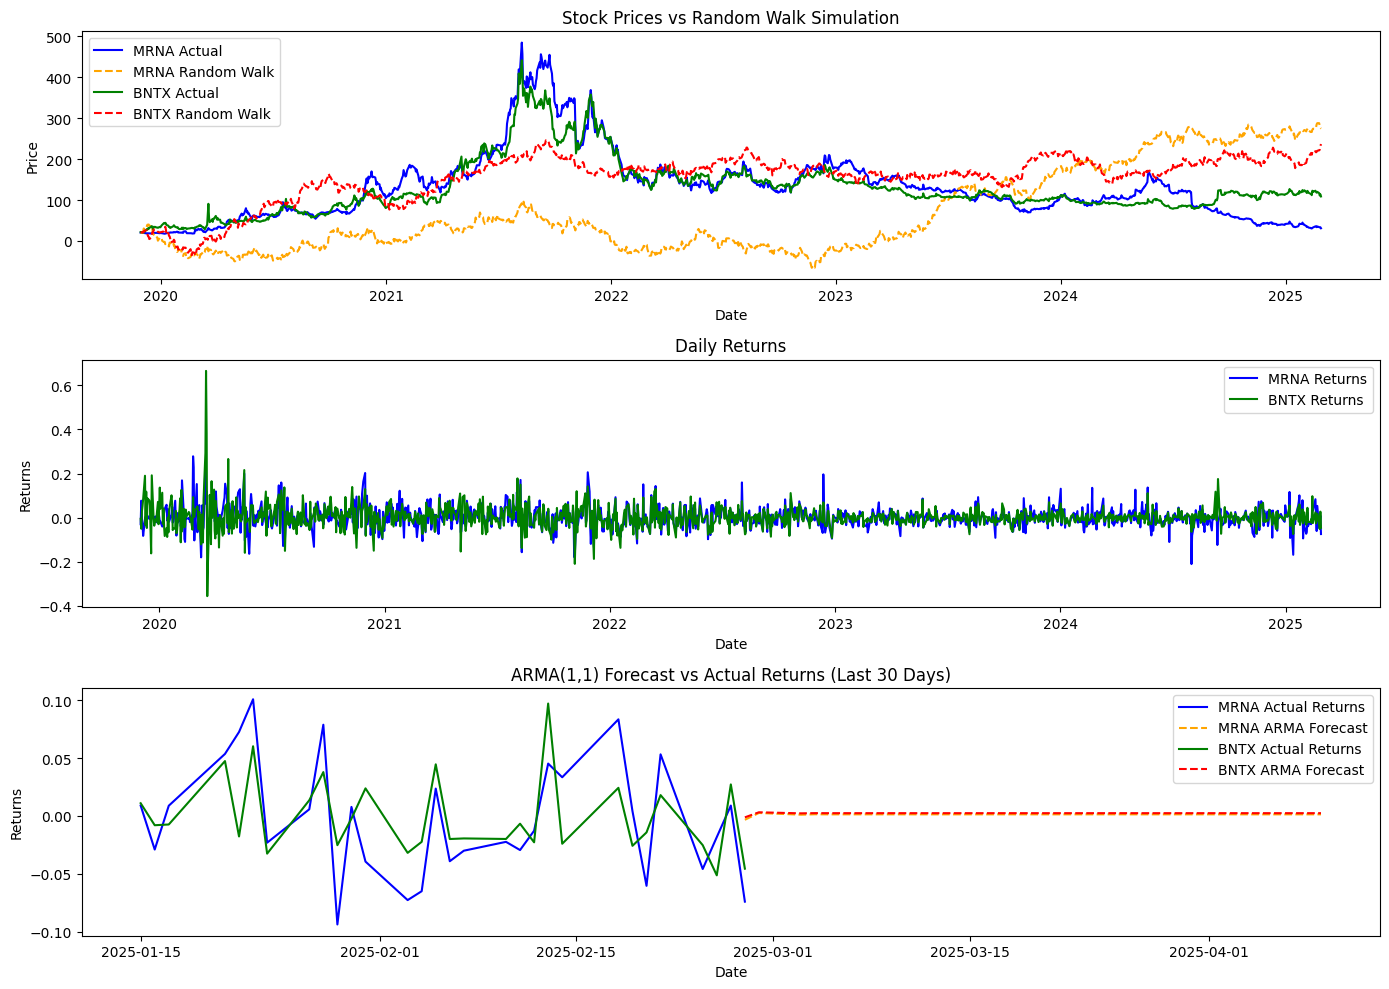

In [17]:
# Install required libraries in Colab
!pip install yfinance statsmodels matplotlib pandas numpy

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Fetch stock data for MRNA and BNTX from Nov 29, 2019
start_date = "2019-11-29"
end_date = "2025-02-28"

print("Fetching data for MRNA...")
mrna_data = yf.download("MRNA", start=start_date, end=end_date)
print("Fetching data for BNTX...")
bntx_data = yf.download("BNTX", start=start_date, end=end_date)

# Extract the 'Close' column correctly from MultiIndex
mrna_prices = mrna_data[("Close", "MRNA")].dropna()
bntx_prices = bntx_data[("Close", "BNTX")].dropna()
print("MRNA Prices Head:\n", mrna_prices.head())
print("BNTX Prices Head:\n", bntx_prices.head())

# Step 2: Simulate a Random Walk
def random_walk_simulation(initial_price, steps, scale=1):
    random_steps = np.random.normal(loc=0, scale=scale, size=steps)
    random_steps[0] = 0  # Start at initial price
    return initial_price + np.cumsum(random_steps)

mrna_rw = random_walk_simulation(mrna_prices.iloc[0], len(mrna_prices), scale=5)
bntx_rw = random_walk_simulation(bntx_prices.iloc[0], len(bntx_prices), scale=5)

# Step 3: Unit Root Test (ADF)
def unit_root_test(series, name):
    result = adfuller(series.dropna())
    print(f"\nUnit Root Test (ADF) for {name}:")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Critical Values:", {k: round(v, 4) for k, v in result[4].items()})
    if result[1] > 0.05:
        print(f"{name} likely has a unit root (non-stationary).")
    else:
        print(f"{name} does not have a unit root (stationary).")

mrna_returns = mrna_prices.pct_change().dropna()
bntx_returns = bntx_prices.pct_change().dropna()

unit_root_test(mrna_prices, "MRNA Prices")
unit_root_test(bntx_prices, "BNTX Prices")
unit_root_test(mrna_returns, "MRNA Returns")
unit_root_test(bntx_returns, "BNTX Returns")

# Step 4: Fit ARMA Model (ARMA(1,1))
def fit_arma(series, name):
    model = ARIMA(series, order=(1, 0, 1))
    fit = model.fit()
    print(f"\nARMA(1,1) Model Summary for {name}:")
    print(fit.summary().tables[1])
    return fit

mrna_arma = fit_arma(mrna_returns, "MRNA Returns")
bntx_arma = fit_arma(bntx_returns, "BNTX Returns")

# Step 5: Plotting
plt.figure(figsize=(14, 10))

# Random Walk vs Actual Prices
plt.subplot(3, 1, 1)
plt.plot(mrna_prices.index, mrna_prices, label="MRNA Actual", color="blue")
plt.plot(mrna_prices.index, mrna_rw, label="MRNA Random Walk", color="orange", linestyle="--")
plt.plot(bntx_prices.index, bntx_prices, label="BNTX Actual", color="green")
plt.plot(bntx_prices.index, bntx_rw, label="BNTX Random Walk", color="red", linestyle="--")
plt.title("Stock Prices vs Random Walk Simulation")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

# Returns
plt.subplot(3, 1, 2)
plt.plot(mrna_returns.index, mrna_returns, label="MRNA Returns", color="blue")
plt.plot(bntx_returns.index, bntx_returns, label="BNTX Returns", color="green")
plt.title("Daily Returns")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()

# ARMA Forecasts (last 30 days)
mrna_forecast = mrna_arma.forecast(steps=30)
bntx_forecast = bntx_arma.forecast(steps=30)
forecast_index = pd.date_range(start=mrna_returns.index[-1], periods=30, freq="B")

plt.subplot(3, 1, 3)
plt.plot(mrna_returns.index[-30:], mrna_returns[-30:], label="MRNA Actual Returns", color="blue")
plt.plot(forecast_index, mrna_forecast, label="MRNA ARMA Forecast", color="orange", linestyle="--")
plt.plot(bntx_returns.index[-30:], bntx_returns[-30:], label="BNTX Actual Returns", color="green")
plt.plot(forecast_index, bntx_forecast, label="BNTX ARMA Forecast", color="red", linestyle="--")
plt.title("ARMA(1,1) Forecast vs Actual Returns (Last 30 Days)")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()

plt.tight_layout()
plt.show()

Fetching data for ENPH...


[*********************100%***********************]  1 of 1 completed


Fetching data for SEDG...


[*********************100%***********************]  1 of 1 completed


ENPH Prices Head:
 Date
2021-01-04    172.240005
2021-01-05    181.479996
2021-01-06    203.380005
2021-01-07    213.759995
2021-01-08    207.410004
Name: (Close, ENPH), dtype: float64
SEDG Prices Head:
 Date
2021-01-04    311.350006
2021-01-05    316.809998
2021-01-06    348.130005
2021-01-07    365.970001
2021-01-08    356.109985
Name: (Close, SEDG), dtype: float64

Unit Root Test (ADF) for ENPH Prices:
ADF Statistic: -1.4642
p-value: 0.5511
Critical Values: {'1%': -3.4366, '5%': -2.8643, '10%': -2.5682}
ENPH Prices likely has a unit root (non-stationary).

Unit Root Test (ADF) for SEDG Prices:
ADF Statistic: -0.9978
p-value: 0.7541
Critical Values: {'1%': -3.4366, '5%': -2.8643, '10%': -2.5682}
SEDG Prices likely has a unit root (non-stationary).

Unit Root Test (ADF) for ENPH Returns:
ADF Statistic: -31.1445
p-value: 0.0000
Critical Values: {'1%': -3.4366, '5%': -2.8643, '10%': -2.5683}
ENPH Returns does not have a unit root (stationary).

Unit Root Test (ADF) for SEDG Returns:
ADF

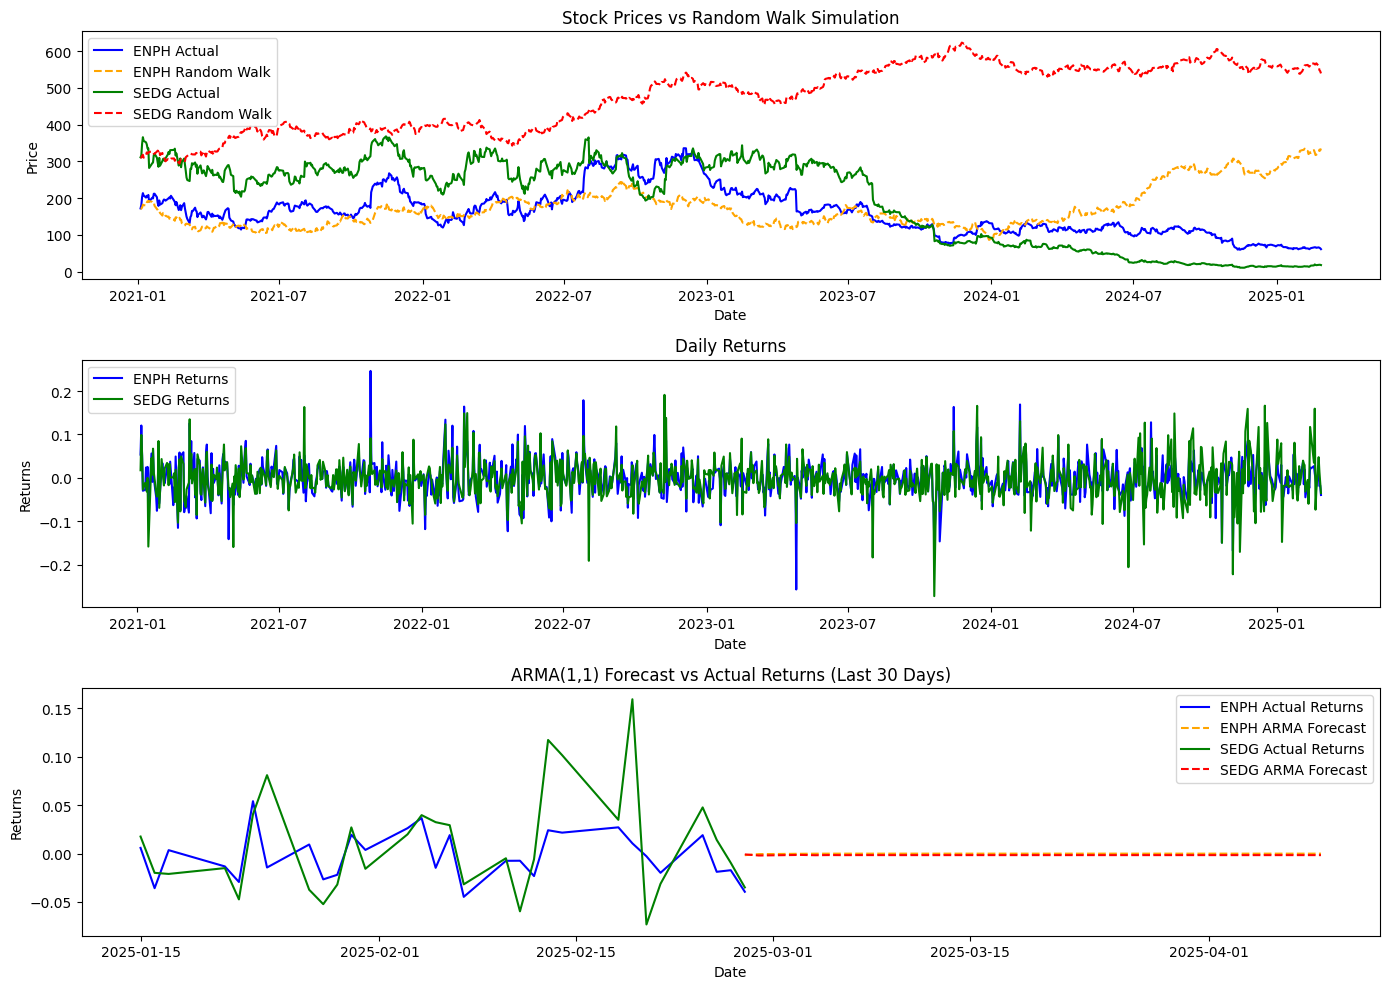

In [19]:
# Install required libraries in Colab
!pip install yfinance statsmodels matplotlib pandas numpy

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Fetch stock data for ENPH and SEDG from Jan 1, 2021
start_date = "2021-01-01"
end_date = "2025-02-28"

print("Fetching data for ENPH...")
enph_data = yf.download("ENPH", start=start_date, end=end_date)
print("Fetching data for SEDG...")
sedg_data = yf.download("SEDG", start=start_date, end=end_date)

# Extract the 'Close' column correctly from MultiIndex
enph_prices = enph_data[("Close", "ENPH")].dropna()
sedg_prices = sedg_data[("Close", "SEDG")].dropna()
print("ENPH Prices Head:\n", enph_prices.head())
print("SEDG Prices Head:\n", sedg_prices.head())

# Step 2: Simulate a Random Walk
def random_walk_simulation(initial_price, steps, scale=1):
    random_steps = np.random.normal(loc=0, scale=scale, size=steps)
    random_steps[0] = 0  # Start at initial price
    return initial_price + np.cumsum(random_steps)

enph_rw = random_walk_simulation(enph_prices.iloc[0], len(enph_prices), scale=5)
sedg_rw = random_walk_simulation(sedg_prices.iloc[0], len(sedg_prices), scale=5)

# Step 3: Unit Root Test (ADF)
def unit_root_test(series, name):
    result = adfuller(series.dropna())
    print(f"\nUnit Root Test (ADF) for {name}:")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Critical Values:", {k: round(v, 4) for k, v in result[4].items()})
    if result[1] > 0.05:
        print(f"{name} likely has a unit root (non-stationary).")
    else:
        print(f"{name} does not have a unit root (stationary).")

enph_returns = enph_prices.pct_change().dropna()
sedg_returns = sedg_prices.pct_change().dropna()

unit_root_test(enph_prices, "ENPH Prices")
unit_root_test(sedg_prices, "SEDG Prices")
unit_root_test(enph_returns, "ENPH Returns")
unit_root_test(sedg_returns, "SEDG Returns")

# Step 4: Fit ARMA Model (ARMA(1,1))
def fit_arma(series, name):
    model = ARIMA(series, order=(1, 0, 1))
    fit = model.fit()
    print(f"\nARMA(1,1) Model Summary for {name}:")
    print(fit.summary().tables[1])
    return fit

enph_arma = fit_arma(enph_returns, "ENPH Returns")
sedg_arma = fit_arma(sedg_returns, "SEDG Returns")

# Step 5: Plotting
plt.figure(figsize=(14, 10))

# Random Walk vs Actual Prices
plt.subplot(3, 1, 1)
plt.plot(enph_prices.index, enph_prices, label="ENPH Actual", color="blue")
plt.plot(enph_prices.index, enph_rw, label="ENPH Random Walk", color="orange", linestyle="--")
plt.plot(sedg_prices.index, sedg_prices, label="SEDG Actual", color="green")
plt.plot(sedg_prices.index, sedg_rw, label="SEDG Random Walk", color="red", linestyle="--")
plt.title("Stock Prices vs Random Walk Simulation")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

# Returns
plt.subplot(3, 1, 2)
plt.plot(enph_returns.index, enph_returns, label="ENPH Returns", color="blue")
plt.plot(sedg_returns.index, sedg_returns, label="SEDG Returns", color="green")
plt.title("Daily Returns")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()

# ARMA Forecasts (last 30 days)
enph_forecast = enph_arma.forecast(steps=30)
sedg_forecast = sedg_arma.forecast(steps=30)
forecast_index = pd.date_range(start=enph_returns.index[-1], periods=30, freq="B")

plt.subplot(3, 1, 3)
plt.plot(enph_returns.index[-30:], enph_returns[-30:], label="ENPH Actual Returns", color="blue")
plt.plot(forecast_index, enph_forecast, label="ENPH ARMA Forecast", color="orange", linestyle="--")
plt.plot(sedg_returns.index[-30:], sedg_returns[-30:], label="SEDG Actual Returns", color="green")
plt.plot(forecast_index, sedg_forecast, label="SEDG ARMA Forecast", color="red", linestyle="--")
plt.title("ARMA(1,1) Forecast vs Actual Returns (Last 30 Days)")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()

plt.tight_layout()
plt.show()